### Name: Lalith Aditya
### Regd No: 22231
### MSC 1st Year
### House Price Prediction
### MDH campus

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1.Getting the Dataset
### Download the datasets (train and test) from the following link –
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/hpp_train.csv')

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Get all numeric columns
numeric_columns_orig = df._get_numeric_data().columns.values.tolist()

In [6]:
numeric_columns_orig

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [7]:
len(numeric_columns_orig)

38

# 2. Preprocessing


## Null Values replacement

In [8]:
column_names = list(df.columns)
len(column_names)

81

In [9]:
# checking which columns are null


null_column_indices = []
for i in range(0,len(column_names)):
  if(df[column_names[i]].isnull().values.any() == True):
    null_column_indices.append(column_names[i])
null_column_indices    

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
len(null_column_indices)

19

### So we have 19 columns which have null values. We will now try to see data types of these 19 columns!

In [11]:
for i in range(0,len(null_column_indices)):
  print(f"{null_column_indices[i]} column has data type : {type(df[null_column_indices[i]][0])}")


LotFrontage column has data type : <class 'numpy.float64'>
Alley column has data type : <class 'float'>
MasVnrType column has data type : <class 'str'>
MasVnrArea column has data type : <class 'numpy.float64'>
BsmtQual column has data type : <class 'str'>
BsmtCond column has data type : <class 'str'>
BsmtExposure column has data type : <class 'str'>
BsmtFinType1 column has data type : <class 'str'>
BsmtFinType2 column has data type : <class 'str'>
Electrical column has data type : <class 'str'>
FireplaceQu column has data type : <class 'float'>
GarageType column has data type : <class 'str'>
GarageYrBlt column has data type : <class 'numpy.float64'>
GarageFinish column has data type : <class 'str'>
GarageQual column has data type : <class 'str'>
GarageCond column has data type : <class 'str'>
PoolQC column has data type : <class 'float'>
Fence column has data type : <class 'float'>
MiscFeature column has data type : <class 'float'>


In [12]:
numeric_cols = df[null_column_indices].select_dtypes(include='number')
numeric_cols

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


##  We have 3 columns which are numeric that have null values. We will do mean imputation for them

<AxesSubplot:xlabel='LotFrontage'>

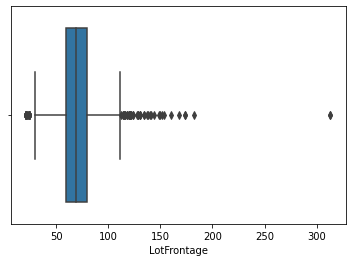

In [13]:
# Lets Visualize all three columns first

import seaborn as sns


sns.boxplot(x=numeric_cols['LotFrontage'])

<AxesSubplot:xlabel='MasVnrArea'>

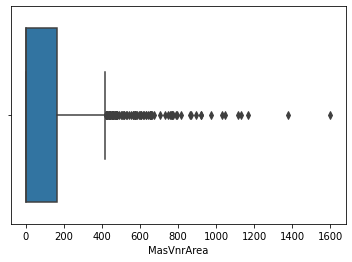

In [14]:
sns.boxplot(x=numeric_cols['MasVnrArea'])


<AxesSubplot:xlabel='GarageYrBlt'>

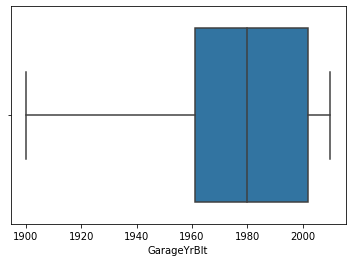

In [15]:
sns.boxplot(x=numeric_cols['GarageYrBlt'])

## These are skewed columns. So as per the internet its saying to impute with mode. So lets do that!

In [16]:
mode_value = df['LotFrontage'].mode()[0]
df['LotFrontage'].fillna(mode_value, inplace=True)


In [17]:
mode_value = df['MasVnrArea'].mode()[0]
df['MasVnrArea'].fillna(mode_value, inplace=True)

In [18]:
mode_value = df['GarageYrBlt'].mode()[0]
df['GarageYrBlt'].fillna(mode_value, inplace=True)

## Now Ive imputed the columns with mode, Lets see their visualizations

<AxesSubplot:xlabel='LotFrontage'>

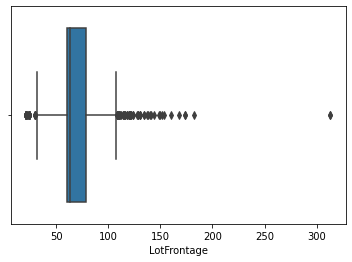

In [19]:
sns.boxplot(x=df['LotFrontage'])

<AxesSubplot:xlabel='MasVnrArea'>

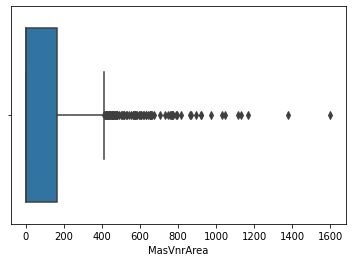

In [20]:
sns.boxplot(x=df['MasVnrArea'])

<AxesSubplot:xlabel='GarageYrBlt'>

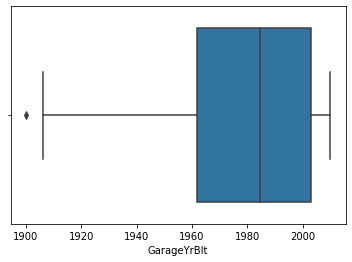

In [21]:
sns.boxplot(x=df['GarageYrBlt'])

## We have filled the columns missing values, Now still they are skewed lets apply log transformation on the columns and see

In [22]:
# apply logarithmic transformation to column B
df['MasVnrArea'] = np.log(df['MasVnrArea'])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
count = 0
for i in range(0,len(df['MasVnrArea'])):
  if(df['MasVnrArea'][i]== float('-inf')):
    count+=1
count    

869

-inf are 869 in number which is more . I will replace those with the min of the non -inf values in the columns

In [24]:
min_val = df['MasVnrArea'].min()
min_val

-inf

In [25]:
# Calculating min
val = []
for i in range(0,len(df['MasVnrArea'])):
  if(df['MasVnrArea'][i]!= float('-inf')):
    val.append(df['MasVnrArea'][i])

min(val)

0.0

In [26]:
# Replacing -inf with 0
df['MasVnrArea'] = df['MasVnrArea'].replace(-np.inf, 0)

In [27]:
df['MasVnrArea']

0       5.278115
1       0.000000
2       5.087596
3       0.000000
4       5.857933
          ...   
1455    0.000000
1456    4.779123
1457    0.000000
1458    0.000000
1459    0.000000
Name: MasVnrArea, Length: 1460, dtype: float64

<AxesSubplot:xlabel='MasVnrArea'>

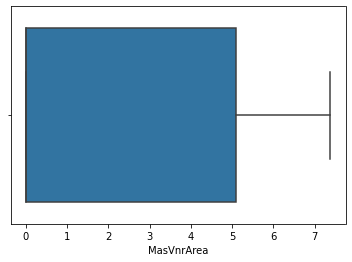

In [28]:
sns.boxplot(x=df['MasVnrArea'])

In [29]:
q1 = df['MasVnrArea'].quantile(0.25)
q3 = df['MasVnrArea'].quantile(0.75)
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# count the number of outliers
num_outliers = ((df['MasVnrArea'] < lower_bound) | (df['MasVnrArea'] > upper_bound)).sum()

# print the number of outliers
print("Number of outliers in column 'MasVnrArea':", num_outliers)

Number of outliers in column 'MasVnrArea': 0


# We will do the same for remaining 2 columns

In [30]:
# apply logarithmic transformation to column A
df['LotFrontage'] = np.log(df['LotFrontage'])


In [31]:
df['LotFrontage']

0       4.174387
1       4.382027
2       4.219508
3       4.094345
4       4.430817
          ...   
1455    4.127134
1456    4.442651
1457    4.189655
1458    4.219508
1459    4.317488
Name: LotFrontage, Length: 1460, dtype: float64

In [32]:
count = 0
for i in range(0,len(df['LotFrontage'])):
  if(df['LotFrontage'][i]== float('-inf')):
    count+=1
count    

0

<AxesSubplot:xlabel='LotFrontage'>

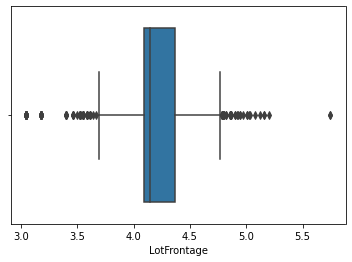

In [33]:
sns.boxplot(x=df['LotFrontage'])

In [34]:
q1 = df['LotFrontage'].quantile(0.25)
q3 = df['LotFrontage'].quantile(0.75)
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# count the number of outliers
num_outliers = ((df['LotFrontage'] < lower_bound) | (df['LotFrontage'] > upper_bound)).sum()

# print the number of outliers
print("Number of outliers in column 'LotFrontage':", num_outliers)

Number of outliers in column 'LotFrontage': 123


In [35]:
df['LotFrontage']

0       4.174387
1       4.382027
2       4.219508
3       4.094345
4       4.430817
          ...   
1455    4.127134
1456    4.442651
1457    4.189655
1458    4.219508
1459    4.317488
Name: LotFrontage, Length: 1460, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

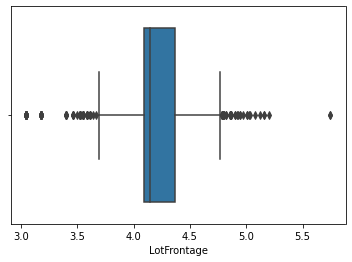

In [36]:
sns.boxplot(x=df['LotFrontage'])

In [37]:
  # apply logarithmic transformation to column C
df['GarageYrBlt'] = np.log(df['GarageYrBlt'])

In [38]:
df['GarageYrBlt']

0       7.602401
1       7.588830
2       7.601402
3       7.599902
4       7.600902
          ...   
1455    7.600402
1456    7.589842
1457    7.570959
1458    7.575585
1459    7.583248
Name: GarageYrBlt, Length: 1460, dtype: float64

<AxesSubplot:xlabel='GarageYrBlt'>

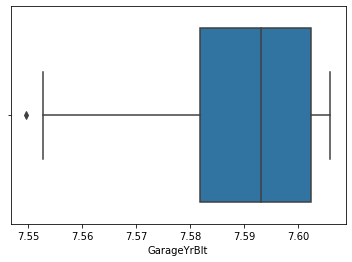

In [39]:
sns.boxplot(x=df['GarageYrBlt'])

In [40]:
q1 = df['GarageYrBlt'].quantile(0.25)
q3 = df['GarageYrBlt'].quantile(0.75)
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# count the number of outliers
num_outliers = ((df['GarageYrBlt'] < lower_bound) | (df['GarageYrBlt'] > upper_bound)).sum()

# print the number of outliers
print("Number of outliers in column 'GarageYrBlt':", num_outliers)

Number of outliers in column 'GarageYrBlt': 1


### All the numeric columns that have missing values are filled we will proceed to the Categorical columns

In [41]:
null_cat_cols = [i for i in null_column_indices if i not in numeric_cols]

In [42]:
len(null_cat_cols)

16

In [43]:
null_cat_cols

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [44]:
# print the number of missing values in each column

for i in range(0,len(null_cat_cols)):
  print(f"For column {null_cat_cols[i]} the number of missing values is {df[null_cat_cols[i]].isnull().sum()}!")

For column Alley the number of missing values is 1369!
For column MasVnrType the number of missing values is 8!
For column BsmtQual the number of missing values is 37!
For column BsmtCond the number of missing values is 37!
For column BsmtExposure the number of missing values is 38!
For column BsmtFinType1 the number of missing values is 37!
For column BsmtFinType2 the number of missing values is 38!
For column Electrical the number of missing values is 1!
For column FireplaceQu the number of missing values is 690!
For column GarageType the number of missing values is 81!
For column GarageFinish the number of missing values is 81!
For column GarageQual the number of missing values is 81!
For column GarageCond the number of missing values is 81!
For column PoolQC the number of missing values is 1453!
For column Fence the number of missing values is 1179!
For column MiscFeature the number of missing values is 1406!


In [45]:
df.shape[0]

1460

### I will drop the columns with more missing values and for less missing values we will impute with mode

In [46]:
# dropping columns with more than 50% ofmissing values
df = df.drop(['Alley', 'PoolQC','Fence','MiscFeature'], axis=1)

In [47]:
drop_cols = ['Alley', 'PoolQC','Fence','MiscFeature']
drop_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [48]:
null_cat_cols = [i for i in null_cat_cols if i not in drop_cols]
len(null_cat_cols)

12

In [49]:
null_cat_cols

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [50]:
null_cat_cols[0]

'MasVnrType'

In [51]:
## These 12 columns we will replace with mode
for i in range(0,len(null_cat_cols)):
  df[null_cat_cols[i]].fillna(df[null_cat_cols[i]].mode()[0], inplace=True)

In [52]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,4.382027,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,4.219508,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,4.094345,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,4.430817,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,4.127134,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,4.442651,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,4.189655,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,4.219508,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [53]:
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 77, dtype: bool

## Now our dataframe has no missing values

In [54]:
## We will see which all columns are categorical

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [55]:
df[cat_cols[len(cat_cols)-1]].nunique()

6

In [56]:

for i in range(0,len(cat_cols)):
  n = df[cat_cols[i]].nunique()
  print(f"Column {cat_cols[i]} has no of unique elements={n}")

Column MSZoning has no of unique elements=5
Column Street has no of unique elements=2
Column LotShape has no of unique elements=4
Column LandContour has no of unique elements=4
Column Utilities has no of unique elements=2
Column LotConfig has no of unique elements=5
Column LandSlope has no of unique elements=3
Column Neighborhood has no of unique elements=25
Column Condition1 has no of unique elements=9
Column Condition2 has no of unique elements=8
Column BldgType has no of unique elements=5
Column HouseStyle has no of unique elements=8
Column RoofStyle has no of unique elements=6
Column RoofMatl has no of unique elements=8
Column Exterior1st has no of unique elements=15
Column Exterior2nd has no of unique elements=16
Column MasVnrType has no of unique elements=4
Column ExterQual has no of unique elements=4
Column ExterCond has no of unique elements=5
Column Foundation has no of unique elements=6
Column BsmtQual has no of unique elements=4
Column BsmtCond has no of unique elements=4
Co

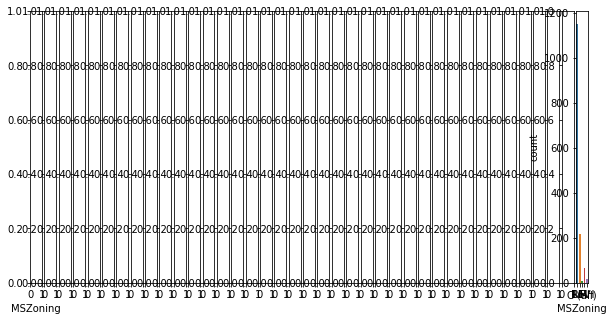

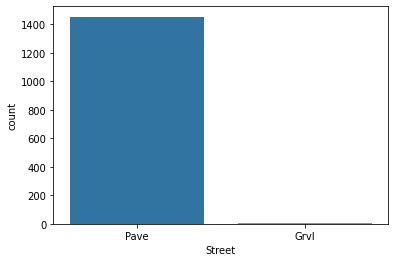

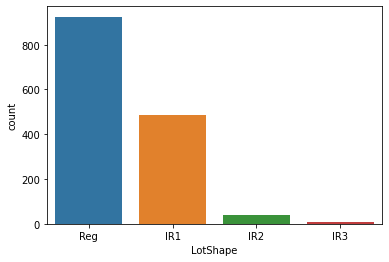

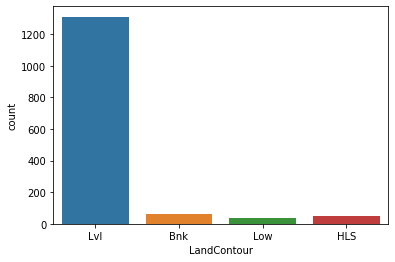

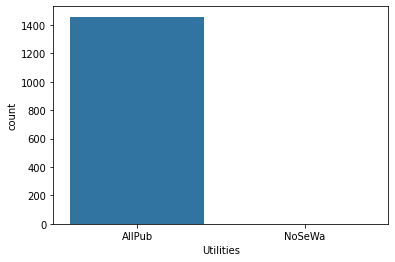

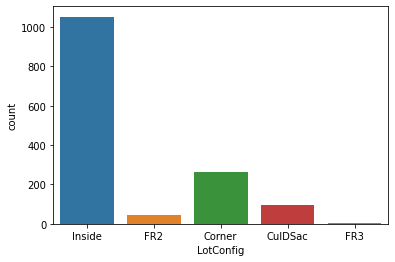

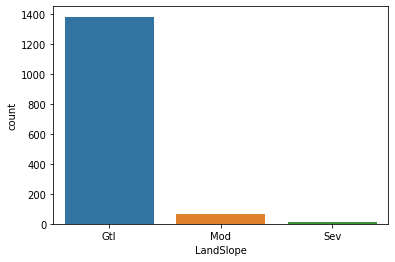

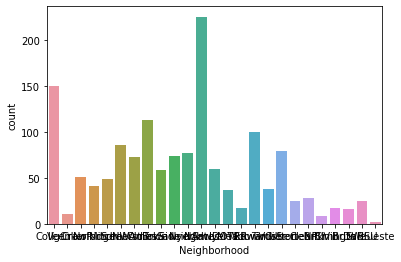

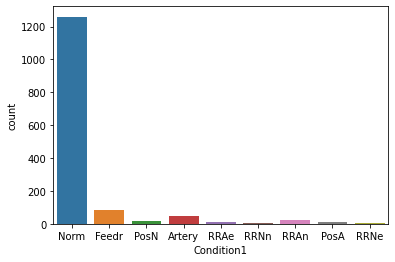

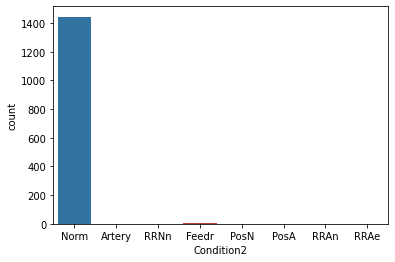

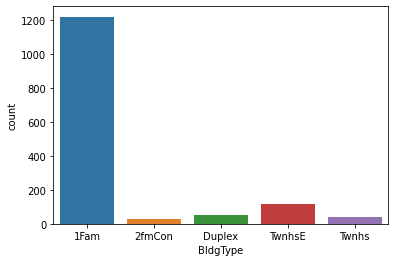

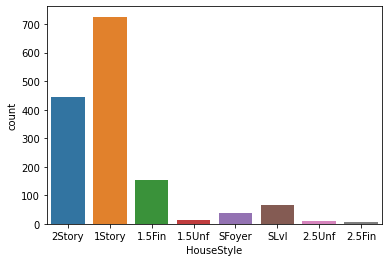

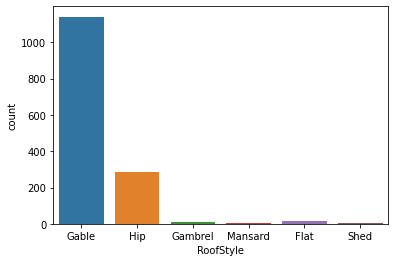

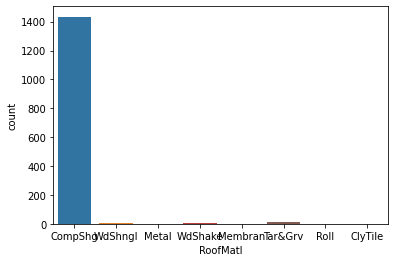

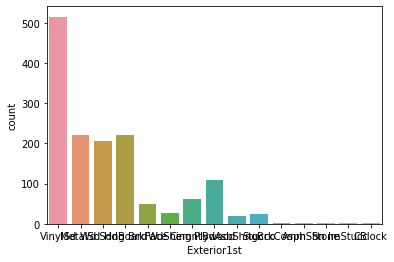

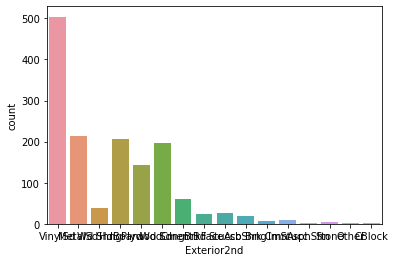

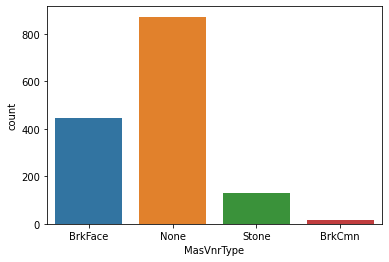

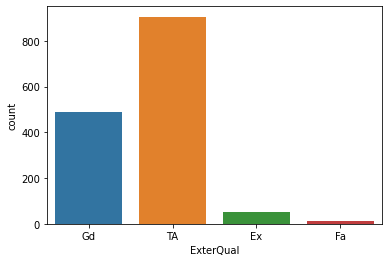

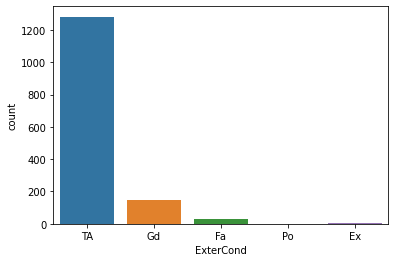

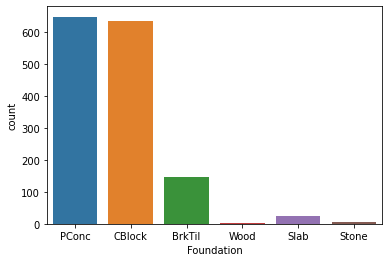

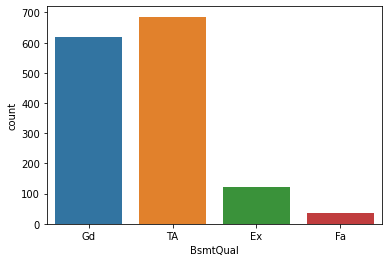

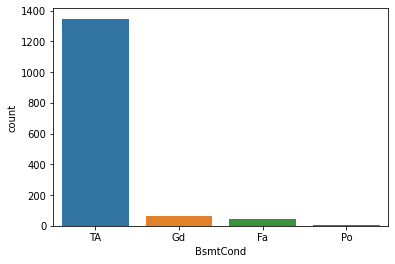

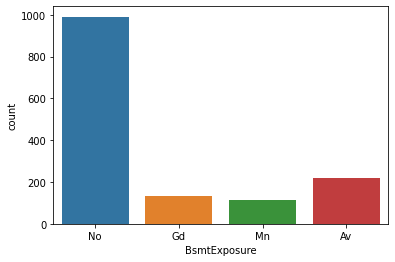

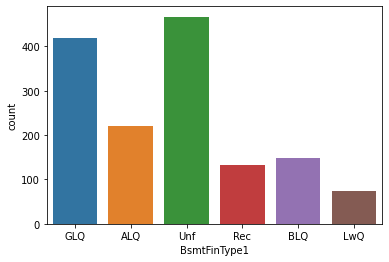

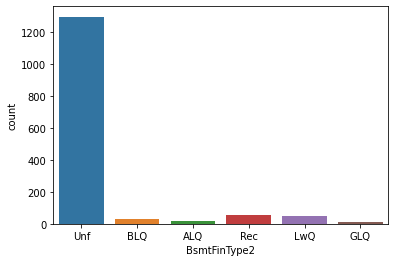

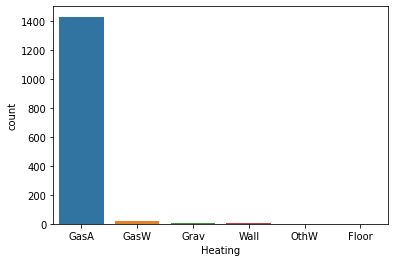

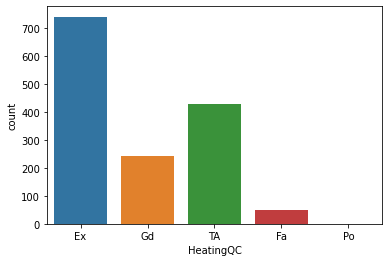

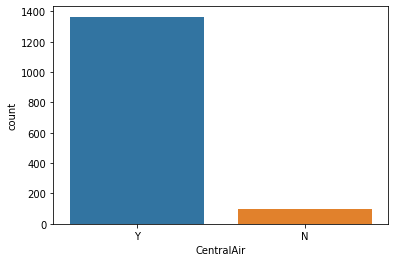

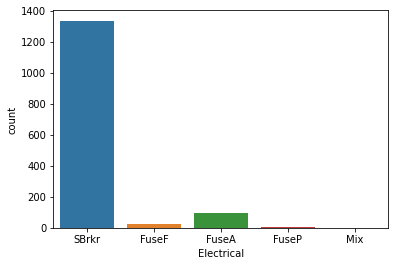

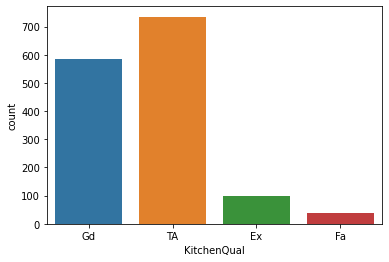

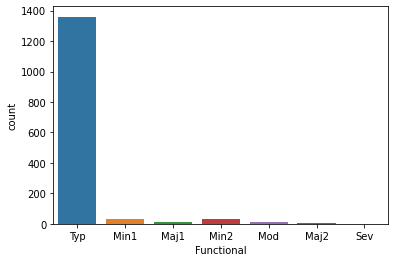

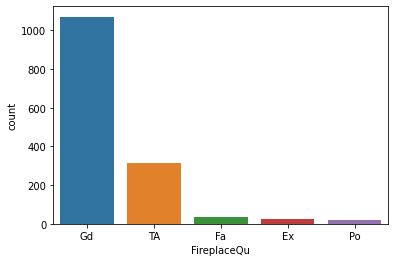

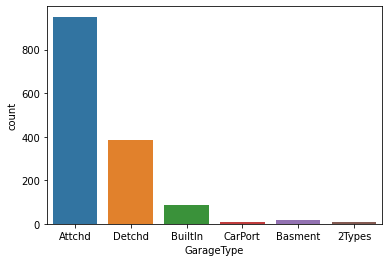

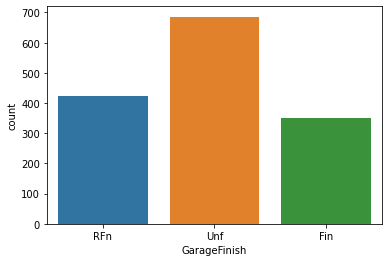

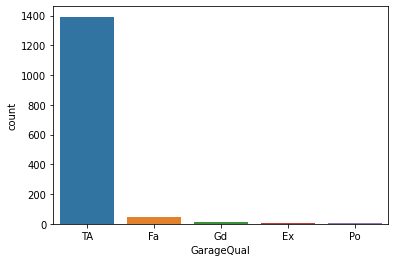

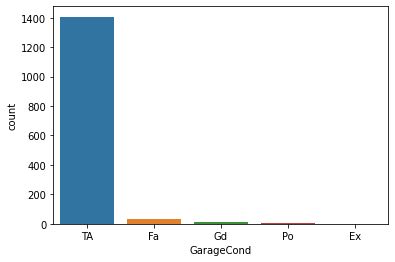

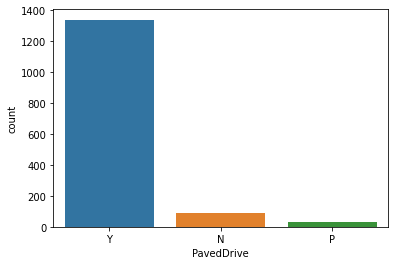

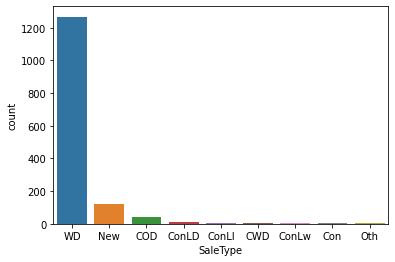

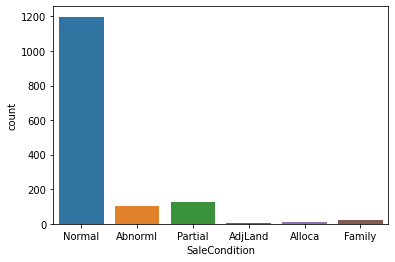

In [57]:
## Lets visualize all the cat columns 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# create subplots
fig, axs = plt.subplots(1, len(cat_cols), figsize=(10, 5))

# loop over columns and create bar plots
for i, col in enumerate(cat_cols):
    sns.countplot(x=cat_cols[i], data=df)
    axs[i].set_xlabel(col)
    plt.show()



## We will label encode columns which have less categories and one hot encode columns with more categories
# Till 6 categories in a column , we are doing label encoding and more than that one hot encoding

In [58]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,4.382027,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,4.219508,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,4.094345,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,4.430817,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,4.127134,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,4.442651,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,4.189655,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,4.219508,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [59]:
copy_df = df

In [60]:
cols_to_label = []
cols_to_onehot = []

for i in range(0, len(cat_cols)):
  if(df[cat_cols[i]].nunique()<=6):
    cols_to_label.append(cat_cols[i])
  else:
    cols_to_onehot.append(cat_cols[i])      

In [61]:
## Columns to get label encoded
print(cols_to_label)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition']


In [62]:
## Columns to get one-hot encoded
print(cols_to_onehot)

['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType']


## Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder 


le = LabelEncoder()

for i in range(0, len(cols_to_label)):
  name = cols_to_label[i]
  print(f"Label Encoding column {name}")
  df[name] = le.fit_transform(df[name])

Label Encoding column MSZoning
Label Encoding column Street
Label Encoding column LotShape
Label Encoding column LandContour
Label Encoding column Utilities
Label Encoding column LotConfig
Label Encoding column LandSlope
Label Encoding column BldgType
Label Encoding column RoofStyle
Label Encoding column MasVnrType
Label Encoding column ExterQual
Label Encoding column ExterCond
Label Encoding column Foundation
Label Encoding column BsmtQual
Label Encoding column BsmtCond
Label Encoding column BsmtExposure
Label Encoding column BsmtFinType1
Label Encoding column BsmtFinType2
Label Encoding column Heating
Label Encoding column HeatingQC
Label Encoding column CentralAir
Label Encoding column Electrical
Label Encoding column KitchenQual
Label Encoding column FireplaceQu
Label Encoding column GarageType
Label Encoding column GarageFinish
Label Encoding column GarageQual
Label Encoding column GarageCond
Label Encoding column PavedDrive
Label Encoding column SaleCondition


In [64]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,WD,4,208500
1,2,20,3,4.382027,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,WD,4,181500
2,3,60,3,4.219508,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,WD,4,223500
3,4,70,3,4.094345,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,WD,0,140000
4,5,60,3,4.430817,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,WD,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.127134,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,WD,4,175000
1456,1457,20,3,4.442651,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,WD,4,210000
1457,1458,70,3,4.189655,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,WD,4,266500
1458,1459,20,3,4.219508,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,WD,4,142125


## One-Hot Encoding

In [65]:
cols_to_onehot = list(cols_to_onehot)
cols_to_onehot

['Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'SaleType']

In [66]:
import pandas as pd

# apply one hot encoding to columns
df_encoded = pd.get_dummies(df, columns=['Neighborhood','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','Functional','SaleType'])

# display the encoded dataframe
print(df_encoded)


        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        1          60         3     4.174387     8450       1         3   
1        2          20         3     4.382027     9600       1         3   
2        3          60         3     4.219508    11250       1         0   
3        4          70         3     4.094345     9550       1         0   
4        5          60         3     4.430817    14260       1         0   
...    ...         ...       ...          ...      ...     ...       ...   
1455  1456          60         3     4.127134     7917       1         3   
1456  1457          20         3     4.442651    13175       1         3   
1457  1458          70         3     4.189655     9042       1         3   
1458  1459          20         3     4.219508     9717       1         3   
1459  1460          20         3     4.317488     9937       1         3   

      LandContour  Utilities  LotConfig  ...  Functional_Typ  SaleType_COD  \
0        

In [67]:
df_encoded.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Functional_Typ,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,3,4.174387,8450,1,3,3,0,4,...,1,0,0,0,0,0,0,0,0,1
1,2,20,3,4.382027,9600,1,3,3,0,2,...,1,0,0,0,0,0,0,0,0,1
2,3,60,3,4.219508,11250,1,0,3,0,4,...,1,0,0,0,0,0,0,0,0,1
3,4,70,3,4.094345,9550,1,0,3,0,0,...,1,0,0,0,0,0,0,0,0,1


In [68]:
result = [x for x in list(copy_df.columns) if x not in list(df_encoded.columns)]
print(result)

['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType']


In [69]:
result == cols_to_onehot

True

## Add Sale Price column to the df_encoded because its the target variable and its not there! 

In [70]:
target_column = df_encoded.pop('SalePrice')

In [71]:
pos = len(df_encoded.columns)

In [72]:
pos

172

In [73]:
df_encoded.insert(pos,'SalePrice', target_column)

In [74]:
df_encoded.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,1,60,3,4.174387,8450,1,3,3,0,4,...,0,0,0,0,0,0,0,0,1,208500
1,2,20,3,4.382027,9600,1,3,3,0,2,...,0,0,0,0,0,0,0,0,1,181500
2,3,60,3,4.219508,11250,1,0,3,0,4,...,0,0,0,0,0,0,0,0,1,223500
3,4,70,3,4.094345,9550,1,0,3,0,0,...,0,0,0,0,0,0,0,0,1,140000
4,5,60,3,4.430817,14260,1,0,3,0,2,...,0,0,0,0,0,0,0,0,1,250000


## Checking if any columns contain categorical values!

In [75]:
x = list(df_encoded.columns)
for i in range(0,len(x)):
  if pd.api.types.is_categorical_dtype(df_encoded[x[i]])==True:
    print(x[i])

## So none of the datatypes are categorical all are encoded ones and numeric..

# Normalization of numeric columns

In [76]:
numeric_columns_orig

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [77]:
numeric_columns_orig.remove('Id')

In [78]:
numeric_columns_orig.remove('SalePrice')

In [79]:
len(numeric_columns_orig)

36

In [80]:
## These are the columns that i want to normalize
numeric_columns_orig

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [81]:
final_norm_cols = numeric_columns_orig

### These are the numeric columns that need to be normalized other than id and SalePrice(Response column)

In [82]:
# Lets Normalize!

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_encoded[final_norm_cols] = scaler.fit_transform(df_encoded[final_norm_cols]) 

In [83]:
df_encoded.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,1,0.073375,3,0.001533,-0.207142,1,3,3,0,4,...,0,0,0,0,0,0,0,0,1,208500
1,2,-0.872563,3,0.646396,-0.091886,1,3,3,0,2,...,0,0,0,0,0,0,0,0,1,181500
2,3,0.073375,3,0.141663,0.073480,1,0,3,0,4,...,0,0,0,0,0,0,0,0,1,223500
3,4,0.309859,3,-0.247054,-0.096897,1,0,3,0,0,...,0,0,0,0,0,0,0,0,1,140000
4,5,0.073375,3,0.797923,0.375148,1,0,3,0,2,...,0,0,0,0,0,0,0,0,1,250000


## Now Preprocessing part is done We have the dataframe to be fitted with various models!

# 3) Implement the all the 5 regression models separately on the data set

# 4. Computing the Mean Squared Error along with the regression models respectively

1.Simple Linear Regression

In [84]:
## This is Evaluation matrics function for all the models that we are going to check with!

# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of MSE
  print(f"Mean Squared error is: {metrics.mean_squared_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [85]:
df_encoded.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,1,0.073375,3,0.001533,-0.207142,1,3,3,0,4,...,0,0,0,0,0,0,0,0,1,208500
1,2,-0.872563,3,0.646396,-0.091886,1,3,3,0,2,...,0,0,0,0,0,0,0,0,1,181500
2,3,0.073375,3,0.141663,0.073480,1,0,3,0,4,...,0,0,0,0,0,0,0,0,1,223500
3,4,0.309859,3,-0.247054,-0.096897,1,0,3,0,0,...,0,0,0,0,0,0,0,0,1,140000
4,5,0.073375,3,0.797923,0.375148,1,0,3,0,2,...,0,0,0,0,0,0,0,0,1,250000


In [86]:
kdf = df_encoded
kdf.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,1,0.073375,3,0.001533,-0.207142,1,3,3,0,4,...,0,0,0,0,0,0,0,0,1,208500
1,2,-0.872563,3,0.646396,-0.091886,1,3,3,0,2,...,0,0,0,0,0,0,0,0,1,181500
2,3,0.073375,3,0.141663,0.073480,1,0,3,0,4,...,0,0,0,0,0,0,0,0,1,223500
3,4,0.309859,3,-0.247054,-0.096897,1,0,3,0,0,...,0,0,0,0,0,0,0,0,1,140000
4,5,0.073375,3,0.797923,0.375148,1,0,3,0,2,...,0,0,0,0,0,0,0,0,1,250000


1.Taking LotArea as the regressor

In [87]:
X = kdf.iloc[:, 4].values
y = kdf.iloc[:, -1].values

In [88]:
X

array([-0.20714171, -0.09188637,  0.07347998, ..., -0.14781027,
       -0.08016039, -0.05811155])

In [89]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [90]:
X.reshape(-1, 1)
y.reshape(-1, 1)

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [91]:
# Train test split

from sklearn.model_selection import train_test_split

X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size = 1/3, random_state = 0)

Estimated coefficients:
b_0 = 181075.90182379176            
b_1 = 19211.328575107585


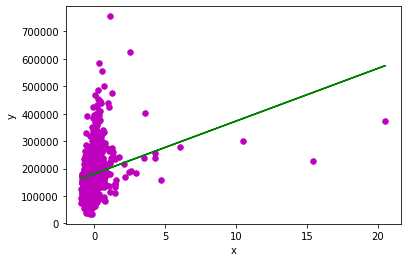

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Code Taken from Geeks_for_Geeks
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main(a,b):
    # observations / data
    x = a
    y = b
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main(X_trainm,y_trainm)

In [93]:
b0,b1 = estimate_coef(X_trainm,y_trainm)


In [94]:
# Linear model with the coefficients
def yhat(x):
  return b0 + x*b1

y_predm = yhat(X_testm)
y_predm

array([223725.73201153, 179098.84871347, 174333.48776072, 180090.42887131,
       164061.48748481, 174689.6864582 , 190200.69568459, 178155.40351474,
       190907.31688445, 170655.97688406, 168971.25331491, 182968.8994266 ,
       181547.95543342, 175918.09061491, 183284.66475842, 177000.16449589,
       180438.92597533, 176364.78303553, 177277.42186042, 165640.3141439 ,
       177231.21229966, 169371.73617477, 177138.79317815, 176470.67994559,
       178386.45131851, 194850.53273544, 164902.8865702 , 164554.38946618,
       186407.66090604, 177154.19636507, 182920.76446748, 178765.75479636,
       175344.32190221, 188282.9989133 , 183631.23646408, 202939.13126574,
       174907.25647342, 175652.38564057, 178877.42790152, 184424.50059035,
       185115.71860329, 174562.61016613, 177706.78569575, 182703.19445227,
       189973.49867755, 181282.25045909, 176682.47376571, 181332.31081657,
       182360.47354334, 182198.7400807 , 187181.67104867, 180637.2420069 ,
       179406.91245182, 1

In [95]:
# Evaluating Metrics
Emetrics(y_testm,y_predm)

Mean Absoulute error is : 54708.482573745845
Mean Squared error is: 5948225304.756423
Root Mean Square error is: 77124.73860413676
R2 score is: 0.07614956656237903


## 2.Taking Overall Condition as Regressor

In [96]:
kdf.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,1,0.073375,3,0.001533,-0.207142,1,3,3,0,4,...,0,0,0,0,0,0,0,0,1,208500
1,2,-0.872563,3,0.646396,-0.091886,1,3,3,0,2,...,0,0,0,0,0,0,0,0,1,181500
2,3,0.073375,3,0.141663,0.073480,1,0,3,0,4,...,0,0,0,0,0,0,0,0,1,223500
3,4,0.309859,3,-0.247054,-0.096897,1,0,3,0,0,...,0,0,0,0,0,0,0,0,1,140000
4,5,0.073375,3,0.797923,0.375148,1,0,3,0,2,...,0,0,0,0,0,0,0,0,1,250000


In [97]:
X = kdf.iloc[:, 13].values
y = kdf.iloc[:, -1].values

In [98]:
X

array([-0.51719981,  2.17962776, -0.51719981, ...,  3.07857028,
        0.38174271,  0.38174271])

In [99]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [100]:
X.reshape(-1, 1)
y.reshape(-1, 1)

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [101]:
# Train test split

X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size = .1, random_state = 0)

Estimated coefficients:
b_0 = 181111.63566787622            
b_1 = -5463.101328121409


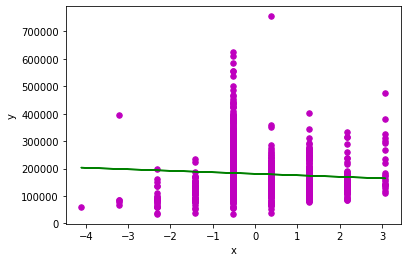

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Code Taken from Geeks_for_Geeks
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main(a,b):
    # observations / data
    x = a
    y = b
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main(X_trainm,y_trainm)

In [103]:
b0,b1 = estimate_coef(X_trainm,y_trainm)

In [104]:
# Linear model with the coefficients
def yhat(x):
  return b0 + x*b1

y_predm = yhat(X_testm)
y_predm

array([193759.17878742, 174115.12245281, 188848.16470377, 183937.15062011,
       183937.15062011, 188848.16470377, 183937.15062011, 179026.13653646,
       183937.15062011, 183937.15062011, 183937.15062011, 179026.13653646,
       183937.15062011, 183937.15062011, 183937.15062011, 179026.13653646,
       183937.15062011, 183937.15062011, 179026.13653646, 169204.10836916,
       188848.16470377, 183937.15062011, 183937.15062011, 183937.15062011,
       179026.13653646, 164293.09428551, 183937.15062011, 179026.13653646,
       183937.15062011, 183937.15062011, 183937.15062011, 183937.15062011,
       179026.13653646, 183937.15062011, 183937.15062011, 183937.15062011,
       183937.15062011, 183937.15062011, 183937.15062011, 183937.15062011,
       174115.12245281, 183937.15062011, 183937.15062011, 183937.15062011,
       183937.15062011, 188848.16470377, 174115.12245281, 179026.13653646,
       183937.15062011, 174115.12245281, 183937.15062011, 174115.12245281,
       183937.15062011, 1

In [105]:
# Evaluating Metrics
Emetrics(y_testm,y_predm)

Mean Absoulute error is : 53820.77601882564
Mean Squared error is: 6769866821.34491
Root Mean Square error is: 82279.2004175108
R2 score is: 0.014878747087314514


## 3. Taking Overall Quality as Regressor

In [106]:
X = kdf.iloc[:, 12].values
y = kdf.iloc[:, -1].values

In [107]:
X

array([ 0.65147924, -0.07183611,  0.65147924, ...,  0.65147924,
       -0.79515147, -0.79515147])

In [108]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [109]:
X.reshape(-1, 1)
y.reshape(-1, 1)

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [110]:
# Train test split

X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size = .2, random_state = 0)

Estimated coefficients:
b_0 = 181391.77464071062            
b_1 = 62747.99073354732


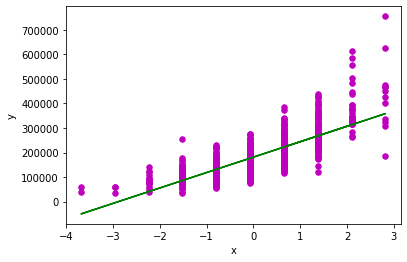

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Code Taken from Geeks_for_Geeks
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main(a,b):
    # observations / data
    x = a
    y = b
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main(X_trainm,y_trainm)

In [112]:
b0,b1 = estimate_coef(X_trainm,y_trainm)

In [113]:
# Linear model with the coefficients
def yhat(x):
  return b0 + x*b1

y_predm = yhat(X_testm)
y_predm

array([176884.20280734, 176884.20280734, 131497.61745068, 222270.78816401,
       176884.20280734, 131497.61745068, 267657.37352068, 176884.20280734,
       358430.54423401, 222270.78816401, 222270.78816401, 131497.61745068,
       222270.78816401, 131497.61745068, 176884.20280734, 131497.61745068,
       222270.78816401,  86111.03209401, 131497.61745068, 222270.78816401,
       131497.61745068, 176884.20280734, 131497.61745068, 176884.20280734,
       176884.20280734, 267657.37352068, 176884.20280734,  86111.03209401,
       313043.95887735, 131497.61745068, 131497.61745068, 222270.78816401,
       176884.20280734, 267657.37352068, 267657.37352068, 222270.78816401,
       313043.95887735, 131497.61745068, 222270.78816401, 267657.37352068,
       176884.20280734, 131497.61745068, 222270.78816401, 267657.37352068,
       267657.37352068, 131497.61745068, 131497.61745068, 131497.61745068,
       176884.20280734,  86111.03209401, 313043.95887735, 131497.61745068,
       176884.20280734,  

In [114]:
# Evaluating Metrics
Emetrics(y_testm,y_predm)

Mean Absoulute error is : 32160.942388859257
Mean Squared error is: 2572969092.660074
Root Mean Square error is: 50724.44275356876
R2 score is: 0.6274218081667629


## Overall Quality is good regressor over other three!
## Its giving more R2 value and less RMSE....

# Multiple Regression

In [115]:
X = kdf.iloc[:, 1:-1].values
y = kdf.iloc[:, -1].values

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [117]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test Result

In [118]:
y_pred = regressor.predict(X_test)
y_pred

array([ 2.60040000e+05,  1.36792000e+05,  1.18840000e+05,  2.23864000e+05,
        1.05944000e+05,  9.16880000e+04,  2.43752000e+05,  1.43448000e+05,
        5.46728000e+05,  1.44920000e+05,  2.05952000e+05, -6.71448280e+15,
        2.31048000e+05,  1.13128000e+05,  1.05240000e+05,  1.49224000e+05,
        2.62184000e+05,  1.16200000e+05,  1.32264000e+05,  1.78680000e+05,
        1.35576000e+05,  1.47784000e+05,  7.54320000e+04,  1.46696000e+05,
        1.94152000e+05,  1.66696000e+05,  1.66408000e+05,  7.28400000e+04,
        3.36056000e+05,  1.05736000e+05,  1.40664000e+05,  2.08440000e+05,
        1.40872000e+05,  3.06952000e+05,  3.52144000e+05,  1.87368000e+05,
        2.97176000e+05,  1.04776000e+05,  2.33256000e+05,  3.68680000e+05,
        2.23912000e+05,  9.71600000e+04,  1.99664000e+05,  3.15544000e+05,
        3.50952000e+05,  1.32504000e+05, -6.71541021e+15,  1.21688000e+05,
        1.69080000e+05,  9.43440000e+04,  3.82632000e+05,  1.51432000e+05,
        1.69704000e+05,  

In [119]:
y_test

array([200624, 133000, 110000, 192000,  88000,  85000, 282922, 141000,
       745000, 148800, 208900, 136905, 225000, 123000, 119200, 145000,
       190000, 123600, 149350, 155000, 166000, 144500, 110000, 174000,
       185000, 168000, 177500,  84500, 320000, 118500, 110000, 213000,
       156000, 250000, 372500, 175000, 277500, 112500, 263000, 325000,
       243000, 130000, 164990, 280000, 403000, 119000, 125000, 128200,
       172500,  84900, 412500, 156000, 167900, 100000, 275000, 123000,
       132000, 239900, 139000, 115000, 137500, 135000, 134450, 180500,
       193500, 156500, 132000, 224500, 139000, 225000, 188500, 118000,
        82000, 392000, 112000, 248900, 134500,  79500, 320000, 158000,
       140000, 136500, 107500, 145000, 200500, 185000, 105000, 202665,
       186000, 136000, 200500, 190000, 187500, 200000, 172500, 157000,
       213000, 185000, 124500, 162900, 260000, 198500, 120000, 159500,
       105900, 260000, 143000, 106500, 178900, 127000,  90350, 118500,
      

In [120]:
# Evaluation metrics for Multiple Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 103212808670190.5
Mean Squared error is: 8.648075146872115e+29
Root Mean Square error is: 929950275384233.4
R2 score is: -1.3431784378527485e+20


## Lets do multiple linear regression with only starting numeric columns 

In [121]:
copyff = numeric_columns_orig

In [122]:

cut_df = df_encoded[copyff]

In [123]:
len(list(cut_df.columns))

36

In [124]:
cut_df.insert(36, "SalePrice", df_encoded['SalePrice'], True)

In [125]:
cut_df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,0.001533,-0.207142,0.651479,-0.517200,1.050994,0.878668,1.204192,0.575425,-0.288653,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,208500
1,-0.872563,0.646396,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.805930,1.171992,-0.288653,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,181500
2,0.073375,0.141663,0.073480,0.651479,-0.517200,0.984752,0.830215,1.131635,0.092907,-0.288653,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,223500
3,0.309859,-0.247054,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.805930,-0.499274,-0.288653,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,140000
4,0.073375,0.797923,0.375148,1.374795,-0.517200,0.951632,0.733308,1.425011,0.463568,-0.288653,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,250000


In [126]:
# Lets do multiple regression with this dataframe

X = kdf.iloc[:, 0:-1].values
y = kdf.iloc[:, -1].values

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [128]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [129]:
y_pred = regressor.predict(X_test)
y_pred

array([257575.28238551, 144847.48172581, 117229.99246332, 220656.4094153 ,
        99976.88405615,  82864.01339917, 249270.13957887, 150121.2796135 ,
       550278.46881039, 148131.9634524 , 208064.39737404,  30246.06319226,
       230213.45534647, 114281.31706208, 109332.53133551, 147741.7110541 ,
       264514.00306267, 114026.63647773, 138219.90669899, 178954.83856741,
       138469.3217047 , 156693.10090598,  69741.33884884, 147103.55302784,
       193026.05492728, 174467.42503383, 167695.59076796,  70537.07552897,
       330822.67595821, 107434.69427308, 140883.27841725, 210094.10249253,
       140267.44116725, 305501.18624705, 355396.67464043, 190646.38407378,
       294724.90793509, 107407.03462764, 232976.81689245, 365160.7420222 ,
       219714.40419332, 101153.93363226, 201093.35756201, 313437.75650493,
       350248.88494749, 132339.03813616,  12590.62422414, 121734.25729626,
       179548.61808015,  93036.37310663, 379519.43410571, 148745.80965626,
       168070.88863814,  

In [130]:
y_test

array([200624, 133000, 110000, 192000,  88000,  85000, 282922, 141000,
       745000, 148800, 208900, 136905, 225000, 123000, 119200, 145000,
       190000, 123600, 149350, 155000, 166000, 144500, 110000, 174000,
       185000, 168000, 177500,  84500, 320000, 118500, 110000, 213000,
       156000, 250000, 372500, 175000, 277500, 112500, 263000, 325000,
       243000, 130000, 164990, 280000, 403000, 119000, 125000, 128200,
       172500,  84900, 412500, 156000, 167900, 100000, 275000, 123000,
       132000, 239900, 139000, 115000, 137500, 135000, 134450, 180500,
       193500, 156500, 132000, 224500, 139000, 225000, 188500, 118000,
        82000, 392000, 112000, 248900, 134500,  79500, 320000, 158000,
       140000, 136500, 107500, 145000, 200500, 185000, 105000, 202665,
       186000, 136000, 200500, 190000, 187500, 200000, 172500, 157000,
       213000, 185000, 124500, 162900, 260000, 198500, 120000, 159500,
       105900, 260000, 143000, 106500, 178900, 127000,  90350, 118500,
      

In [131]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 21278.52378962575
Mean Squared error is: 2077030344.2028449
Root Mean Square error is: 45574.44836970432
R2 score is: 0.677405396493557


## This is giving good R2 score than the columns that have categorical values encoded in them as tuples... Lets proceed with this only
cut_df

## Polynomial Regression

# Using original dataframe

In [132]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load your dataset and split into X (independent variables) and y (dependent variable)
X = kdf.iloc[:, 1:-1].values
y = kdf.iloc[:, -1].values

# Fit polynomial regression model
poly = PolynomialFeatures(degree=1) # set degree of polynomial
X_poly = poly.fit_transform(X) # create polynomial features
poly_reg = LinearRegression() # create linear regression model
poly_reg.fit(X_poly, y) # fit model on polynomial features

# Make predictions
y_pred = poly_reg.predict(X_poly)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2 score: {r2}")

RMSE: 23228.31085246846
R^2 score: 0.9144486266255553


# Using dataframe with only numeric columns

In [133]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load your dataset and split into X (independent variables) and y (dependent variable)
X = cut_df.iloc[:, 0:-1].values
y = cut_df.iloc[:, -1].values

# Fit polynomial regression model
poly = PolynomialFeatures(degree=1) # set degree of polynomial
X_poly = poly.fit_transform(X) # create polynomial features
poly_reg = LinearRegression() # create linear regression model
poly_reg.fit(X_poly, y) # fit model on polynomial features

# Make predictions
y_pred = poly_reg.predict(X_poly)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2 score: {r2}")

RMSE: 34558.364222176955
R^2 score: 0.8106357107820358


## The earlier dataframe with all columns is good for this polynomial regression!

# Decision Tree Regression

# using original dataframe

In [134]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and split into X (independent variables) and y (dependent variable)
X = kdf.iloc[:, 1:-1].values
y = kdf.iloc[:, -1].values

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree regression model
model = DecisionTreeRegressor(max_depth=5) # Set max_depth to avoid overfitting
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

Emetrics(y_test,y_pred)

Mean Absoulute error is : 27100.32392724044
Mean Squared error is: 1494099148.052245
Root Mean Square error is: 38653.578722444894
R2 score is: 0.8052104815760941


# using dataframe that only contains numeric columns

In [135]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and split into X (independent variables) and y (dependent variable)
X = cut_df.iloc[:, 0:-1].values
y = cut_df.iloc[:, -1].values

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree regression model
model = DecisionTreeRegressor(max_depth=5) # Set max_depth to avoid overfitting
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

Emetrics(y_test,y_pred)

Mean Absoulute error is : 27520.79792996894
Mean Squared error is: 1570585737.2610302
Root Mean Square error is: 39630.61616050185
R2 score is: 0.7952387297701387


## Both are giving the same results

# Random Forest Regression

# using the original dataframe

In [136]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset

# Splitting the data into training and testing sets
X = kdf.iloc[:, 1:-1].values
y = kdf.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

Emetrics(y_test,y_pred)

Mean Absoulute error is : 17387.970188356165
Mean Squared error is: 904889858.8495914
Root Mean Square error is: 30081.387249420386
R2 score is: 0.8547469175395225


# Using the dataframe that has only numeric columns

In [137]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset

# Splitting the data into training and testing sets
X = cut_df.iloc[:, 0:-1].values
y = cut_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

Emetrics(y_test,y_pred)

Mean Absoulute error is : 18005.11657534247
Mean Squared error is: 1036507304.8436159
Root Mean Square error is: 32194.83351166171
R2 score is: 0.8473252892042858


## The original dataframe is little better!

#5) Specific to Random Forest Algorithm -
### a. Find the importance of each of the features and visualize them
### b. Build a new model by only taking the most important metrics
### c. Compare the results of both the models

# a)Feature Selection

## We are using the original dataframe only

In [138]:
# Train_Test_Split Method

X = kdf.iloc[:, 1:-1].values
y = kdf.iloc[:, -1].values

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [140]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [141]:
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
print(X_train_fs) 
print(X_test_fs)
print(fs)

[[ 0.66458604  3.          0.64639567 ...  0.          0.
   1.        ]
 [-0.87256276  3.          0.23168926 ...  1.          0.
   0.        ]
 [-0.87256276  3.          0.36201683 ...  0.          0.
   1.        ]
 ...
 [-0.87256276  3.         -0.24705417 ...  0.          0.
   1.        ]
 [-0.16310947  3.         -0.51728408 ...  0.          0.
   1.        ]
 [ 1.49228154  3.         -0.63232259 ...  0.          0.
   1.        ]]
[[-0.87256276  3.          0.23168926 ...  0.          0.
   1.        ]
 [ 0.07337496  3.          1.27666597 ...  0.          0.
   1.        ]
 [-0.63607833  4.         -0.46132428 ...  0.          0.
   1.        ]
 ...
 [ 0.07337496  3.         -1.07224445 ...  0.          0.
   1.        ]
 [-0.87256276  3.         -1.83351754 ...  0.          0.
   1.        ]
 [-0.16310947  3.         -0.81328745 ...  0.          0.
   1.        ]]
SelectKBest(k='all', score_func=<function f_regression at 0x7f9aaf13db80>)


In [142]:
import matplotlib.pyplot as plt

Feature 0: 10.019839
Feature 1: 40.774917
Feature 2: 106.701111
Feature 3: 75.604001
Feature 4: 0.017610
Feature 5: 55.270919
Feature 6: 0.001959
Feature 7: 0.326907
Feature 8: 0.540190
Feature 9: 6.843808
Feature 10: 7.364512
Feature 11: 1579.075242
Feature 12: 4.651362
Feature 13: 357.477597
Feature 14: 365.768894
Feature 15: 49.561754
Feature 16: 0.950521
Feature 17: 180.485381
Feature 18: 589.539687
Feature 19: 20.604019
Feature 20: 144.626680
Feature 21: 550.841809
Feature 22: 6.149227
Feature 23: 100.756861
Feature 24: 5.274337
Feature 25: 141.845226
Feature 26: 0.079603
Feature 27: 0.008230
Feature 28: 53.039936
Feature 29: 521.882716
Feature 30: 9.008291
Feature 31: 204.040644
Feature 32: 79.072705
Feature 33: 55.748040
Feature 34: 501.613274
Feature 35: 90.004688
Feature 36: 0.013533
Feature 37: 824.979408
Feature 38: 58.463805
Feature 39: 2.681404
Feature 40: 402.863882
Feature 41: 78.624768
Feature 42: 23.799477
Feature 43: 23.122425
Feature 44: 464.074076
Feature 45: 355.55

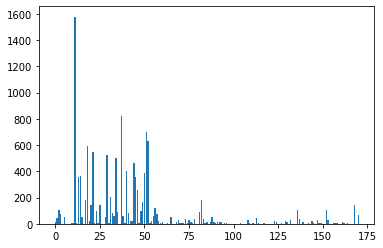

In [143]:
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [144]:
index1 = []
for i in range(0,len(fs.scores_)):
  if(fs.scores_[i]>=200):
    index1.append(i+1)
index1.append(len(list(kdf.columns))-1)   # we are including the normlaized target column also 
index1

[12, 14, 15, 19, 22, 30, 32, 35, 38, 41, 45, 46, 47, 51, 52, 53, 172]

# b. Building a new dataframe from important columns and applying Random Forest Algorithm

In [145]:
# Now our feature selected dataframe is ready
fit_kdf = kdf.iloc[:,index1]
fit_kdf

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,SalePrice
0,0.651479,1.050994,0.878668,2,2,-0.459303,0,-0.793434,0.370333,0.789741,2,0.912210,-0.951226,1,0.311725,0.351000,208500
1,-0.071836,0.156734,-0.429577,3,2,0.466465,0,0.257140,-0.482512,0.789741,3,-0.318683,0.600495,1,0.311725,-0.060731,181500
2,0.651479,0.984752,0.830215,2,2,-0.313369,0,-0.627826,0.515013,0.789741,2,-0.318683,0.600495,1,0.311725,0.631726,223500
3,0.651479,-1.863632,-0.720298,3,3,-0.687324,2,-0.521734,0.383659,-1.026041,2,0.296763,0.600495,2,1.650307,0.790804,140000
4,1.374795,0.951632,0.733308,2,2,0.199680,0,-0.045611,1.299326,0.789741,2,1.527656,0.600495,1,1.650307,1.698485,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,0.733308,3,2,-0.238122,0,-0.542435,0.250402,0.789741,3,0.296763,0.600495,1,0.311725,-0.060731,175000
1456,-0.071836,0.222975,0.151865,3,2,1.104925,4,2.355701,1.061367,0.789741,3,0.296763,2.152216,2,0.311725,0.126420,210000
1457,0.651479,-1.002492,1.024029,0,3,0.215641,0,0.065656,1.569647,0.789741,2,1.527656,2.152216,1,-1.026858,-1.033914,266500
1458,-0.795151,-0.704406,0.539493,3,3,0.046905,2,-0.218982,-0.832788,-1.026041,2,-0.934130,-0.951226,2,-1.026858,-1.090059,142125


In [146]:
# Now our dataframe is ready with selected features and normalized data

# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset

# Splitting the data into training and testing sets
X = fit_kdf.iloc[:, 0:-1].values
y = fit_kdf.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

## Evaluating the new model performance on Random Forest Algorithm

In [147]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 18922.447101272017
Mean Squared error is: 910420217.325716
Root Mean Square error is: 30173.170488460706
R2 score is: 0.8538591834049066


# The R2 Value of both the models is very close
##But the non_pruned dataframe has little more R2 values maybe because of other remaining colums also contributing little more individually 
## ------------------THE DIFFERENCE OBSERVED IS------------------
### New Model R2 is: 0.8538 Vs Old Model R2: 0.8547
### RMSE New Model: 30.173K Vs Old Model: 30.081K

## Conculsion:

Both models in the Random Forest Regression is almost the same. We can observe that all the columns are having something little to contribute to enhance the model little by little...
Furthermore.........
If we remove too many columns and see take the best columns which are contributing the most, we would get a lesser R2-value.

So Majority of the columns should be included(Not all), Very less contributing columns should be removed!!!